In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df=pd.read_csv("Placement.csv")

In [3]:
df=df.drop(columns=['Student_ID'])

In [4]:
le_results=LabelEncoder()
df['Placement']=le_results.fit_transform(df['Placement'])

In [5]:
categorical_columns = [
    'CGPA','IQ'
]

In [6]:
for col in categorical_columns:
  df[col]=LabelEncoder().fit_transform(df[col])

In [8]:
x=df.iloc[:,:-1]
y=df['Placement']

In [9]:
x

,CGPA,IQ
0,26,34
1,17,23
2,13,33
3,31,39
4,16,47
...,...,...
95,4,68
96,5,1
97,25,64
98,21,22


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [12]:
y_pred=model.predict(x_test)

In [13]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.85

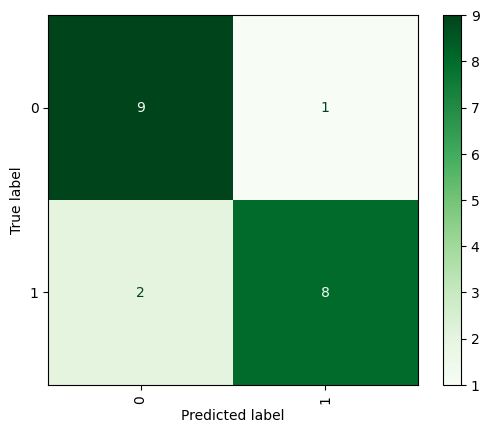

In [15]:
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le_results.classes_)
disp.plot(cmap='Greens')
plt.xticks(rotation=90)
plt.show()